In [ ]:
# The problem of signal separation for a given basis signal and the linear span.
# Here the dimensionality of this span is visualized

In [ ]:
# Read the data flies and import functions
import numpy as np
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive')
import sys
f_path = '/content/drive/MyDrive/AlohaCollisionDetector'
sys.path.insert(0,f_path)
# %ls {f_path}

Mounted at /content/drive


In [ ]:
# Load the data and make complex vectors
f_prefx = '/data/inphase_quadrature_'
with open(f_path + f_prefx + 'data.json') as f:
  data = np.array(json.load(f))
with open(f_path + f_prefx + 'noise.json') as f:
  noise = np.array(json.load(f))
# Read the library files with centroids
iqdata = data[:,0,:] + 1j*data[:,1,:]
iqnoise = noise[:,0,:] + 1j*noise[:,1,:]

In [ ]:
# Fill the library with centroids
idx_clusters = {(762, 647, 7, 169, 794, 331, 886, 183, 538, 859), (195, 612, 133, 325, 40, 136, 733, 171, 844, 936, 494, 463, 439, 88, 985, 955, 189, 734), (385, 738, 840, 112, 146, 530, 831), (224, 800, 5, 281, 517, 711, 9, 586, 842, 535, 152, 121, 862), (777, 267, 664, 555, 815, 566, 185, 698, 709, 837, 456, 594, 731, 860, 606, 996, 358, 619, 627), (514, 645, 775, 264, 265, 393, 520, 791, 413, 286, 543, 38, 294, 309, 949, 316, 318, 726, 987, 997, 511), (471, 578, 681, 28, 527, 498, 403, 468, 277, 245, 438, 377, 220, 319), (577, 865, 259, 452, 389, 361, 969, 523, 273, 595, 767, 952, 797, 191), (321, 162, 994, 356, 774, 295, 491, 269, 909, 368, 785, 434, 499, 881), (672, 100, 613, 932, 71, 487, 970, 303, 274, 658, 729), (384, 352, 552, 876, 973, 696, 728, 766, 692, 820, 792, 61, 30, 447), (513, 398, 787, 409, 921, 174, 433, 563, 53, 450, 454, 332, 591, 83, 485, 877, 878, 892, 637, 254, 383), (802, 771, 901, 744, 600, 683, 461, 366, 976, 529, 338, 536, 890, 700, 829, 510, 415), (386, 29, 35, 678, 42, 568, 317, 832, 327, 713, 216, 990, 350, 223, 353, 102, 753, 246, 247), (963, 682, 107, 251, 655, 50, 984, 187), (544, 928, 34, 549, 679, 967, 459, 588, 972, 814, 855, 80, 951, 818, 308, 663, 57), (65, 741, 262, 614, 235, 587, 748, 430, 558, 114, 179, 978, 918, 151, 694, 506, 95), (993, 515, 231, 810, 906, 782, 175, 560, 783, 210, 371, 853, 182, 375, 636, 445), (641, 905, 525, 142, 147, 659, 427, 428, 812, 305, 823, 184, 314, 571, 194, 581, 843, 854, 215, 605, 868, 364, 751, 382), (899, 67, 44, 78, 703, 84, 666, 891, 285, 287), (609, 418, 930, 518, 712, 590, 654, 910, 948, 373, 917, 408, 249, 953, 988, 893, 894), (354, 706, 132, 451, 137, 10, 299, 938, 334, 888, 633, 186, 155, 607), (387, 400, 21, 407, 291, 807, 553, 178, 306, 59, 63, 82, 470, 856, 94, 228, 374, 889, 124), (288, 481, 98, 992, 36, 838, 871, 424, 302, 432, 592, 691, 924), (394, 279, 923, 806, 935, 688, 188, 958, 960, 458, 718, 977, 339, 85, 597, 347, 242, 634, 127), (737, 37, 550, 455, 202, 460, 653, 749, 781, 49, 379, 276, 437, 983, 158, 765, 222, 763), (1, 97, 324, 968, 201, 149, 213, 981, 539), (3, 422, 839, 72, 939, 473, 14, 48, 466, 819, 55, 217, 764), (225, 257, 995, 134, 742, 870, 173, 975, 528, 278, 758, 24, 346, 60, 799), (675, 292, 869, 599, 359, 8, 232, 297, 426, 908, 813, 965, 982, 572, 476, 828, 509, 62), (256, 322, 453, 329, 496, 848, 370, 340, 148, 312, 478), (611, 70, 326, 616, 234, 492, 205, 46, 493, 752, 52, 405, 150, 825, 601, 827, 93), (416, 768, 962, 548, 168, 618, 811, 301, 141, 944, 884, 280, 477), (545, 580, 484, 646, 39, 746, 238, 367, 850, 501, 214, 760, 25), (128, 769, 803, 101, 841, 524, 333, 465, 497, 562, 979, 502, 695, 313, 858, 735), (954, 673, 804, 166, 583, 330, 76, 686, 623, 942, 113, 690, 337, 22, 603, 123, 444, 830), (576, 33, 522, 650, 778, 621, 143, 207, 79, 879, 851, 436, 701), (320, 864, 872, 617, 395, 13, 847, 402, 883, 467, 822, 727, 344, 732, 159), (448, 801, 129, 643, 391, 488, 846, 912, 18, 786, 629), (770, 4, 135, 903, 780, 915, 153, 420, 165, 934, 561, 817, 323, 198, 722, 212, 863, 482, 227, 610, 486, 250, 252), (66, 933, 103, 907, 429, 239, 208, 431, 495, 117, 697, 604, 638), (260, 138, 284, 163, 676, 554, 689, 945, 565, 311, 569, 699, 574, 836, 69, 966, 596, 89, 475, 348, 230), (674, 805, 551, 635, 92, 882, 946, 947, 857, 505, 315, 956, 31), (704, 705, 644, 648, 585, 298, 362, 620, 808, 111, 310, 56, 218, 446), (897, 99, 388, 197, 998, 392, 170, 779, 300, 206, 719, 625, 757, 761, 157), (736, 419, 104, 649, 266, 714, 652, 268, 180, 500, 125, 479), (6, 200, 759, 236, 557, 219, 15, 684, 880, 20, 181, 54, 919, 661, 91, 540, 989), (423, 904, 73, 489, 75, 490, 575, 845, 47, 875, 925, 914, 341, 118, 885, 26, 349, 255), (773, 12, 531, 662, 920, 793, 154, 425, 570, 74, 725, 86, 343, 986, 233, 241, 116, 507, 895), (512, 866, 390, 77, 974, 685, 464, 657, 717, 435, 564, 849, 980, 602), (226, 357, 122, 105, 140, 622, 784, 537, 90, 380, 927), (480, 640, 258, 642, 964, 261, 263, 556, 943, 469, 821, 665, 442, 826, 670), (651, 795, 411, 931, 164, 172, 559, 304, 307, 441, 589, 336, 342, 867, 503, 743, 756, 887, 378), (32, 929, 417, 833, 521, 937, 81, 145, 51, 721, 693, 755, 87, 351), (160, 64, 96, 516, 421, 708, 584, 106, 365, 526, 941, 816, 209, 913, 27, 156, 957), (192, 290, 483, 582, 199, 472, 874, 144, 176, 401, 926, 950, 23, 632, 922, 508, 542, 991), (0, 130, 900, 519, 911, 275, 660, 916, 790, 796, 669, 546, 567, 58, 193, 971, 248, 615, 240, 754, 504), (902, 776, 404, 533, 667, 798, 161, 547, 293, 702, 457, 593, 608, 229, 363, 237, 750, 630, 631), (898, 399, 272, 656, 852, 372, 598, 120, 730, 412, 671), (396, 397, 788, 410, 45, 440, 573, 961, 707, 196, 710, 715, 462, 720, 861, 221, 355, 360, 244, 376), (131, 68, 677, 680, 745, 108, 270, 335, 16, 19, 723, 443, 190, 639), (896, 2, 17, 532, 534, 406, 959, 579, 204, 345, 999, 747, 109, 110, 369, 626, 628, 253, 126), (289, 328, 809, 873, 43, 940, 271, 624, 474, 115, 789, 119, 282, 283, 668, 541, 414), (449, 739, 740, 772, 167, 41, 11, 139, 203, 716, 687, 177, 211, 243, 381)}
# Convert list of sets into dictionary
dict_cluster = {c[0]: list(c[:]) for c in idx_clusters}
# print(dict_cluster)
iqlib = iqdata[list(dict_cluster.keys())]

In [ ]:
from functions import find_shiftX_exhaust, shift_x
from plots import plt_clust_Xy

def shift_X(X, shifts):
  # Call shift_x for each column in the matrix X
  for j in range(len(shifts)):
    X[:,j] = shift_x(X[:,j], shifts[j])
  return X

The (length) and the (number of signals) = (39, 64)
First singular values [1.52543996e+01 1.48140118e+01 1.37136408e+01 1.22816608e+01
 1.11149271e+01 1.02324542e+01 8.46686729e+00 5.65984858e+00
 4.25615625e+00 2.06559817e+00 1.21143205e+00 5.45097717e-01
 2.47927020e-01 9.96734757e-02 3.47979128e-02 1.01006212e-02
 4.10299511e-03]


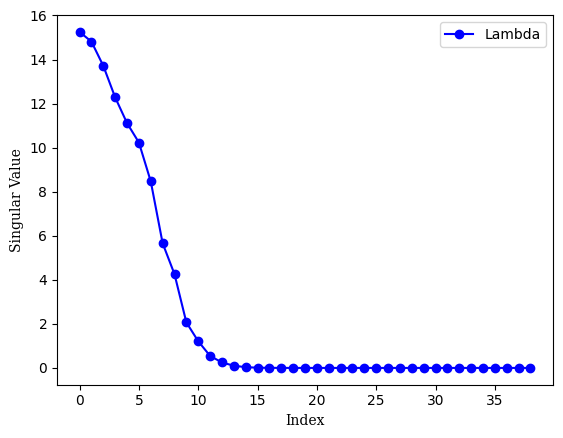

In [ ]:
# Analyse the dimensionality of the basis with SVD
#print(iqlib.shape)
A = iqlib.transpose()
print('The (length) and the (number of signals) =', A.shape)

# Plot singular values
U, Lambda, Vt = np.linalg.svd(A, full_matrices=True)
print('First singular values', Lambda[list(range(17))])

plt.plot(Lambda, marker='o', linestyle='-', color='b', label='Lambda')
plt.xlabel('Index', fontname='DejaVu Serif')
plt.ylabel('Singular Value', fontname='DejaVu Serif')
plt.legend()
plt.show()

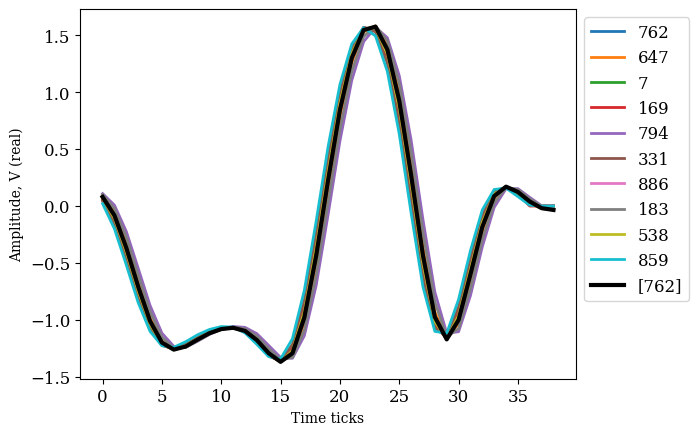

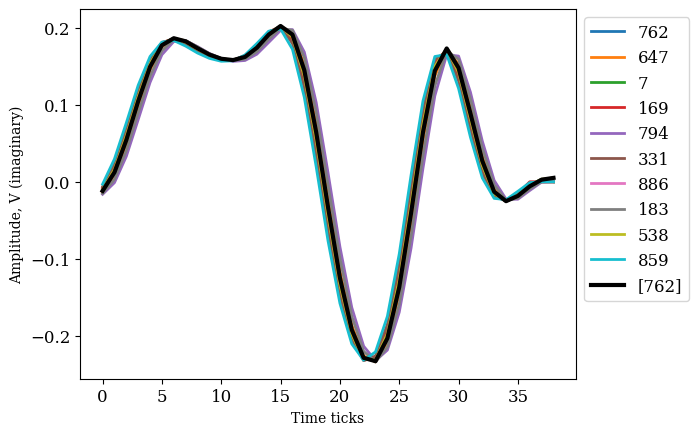

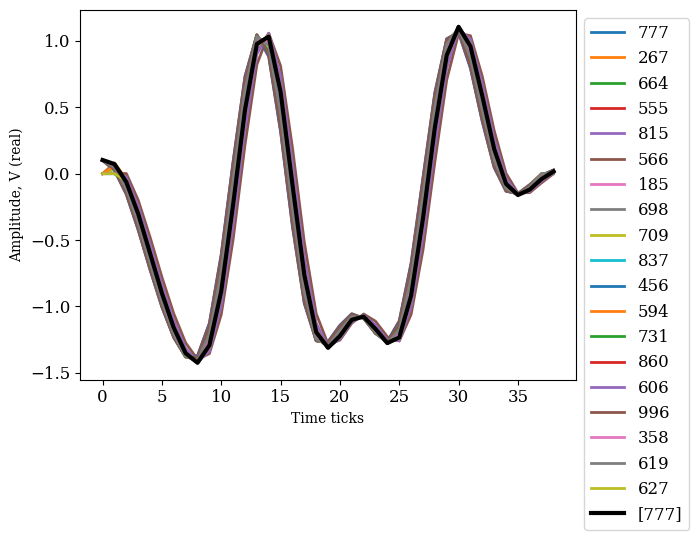

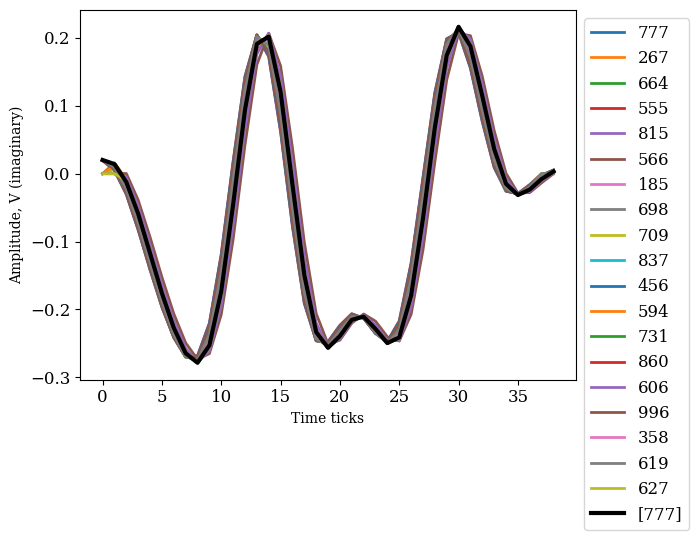

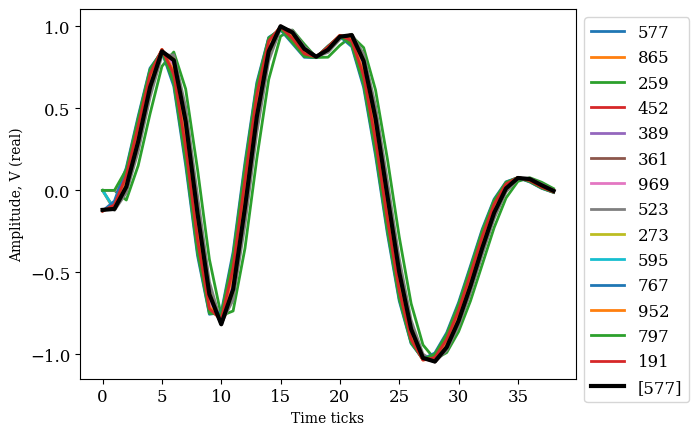

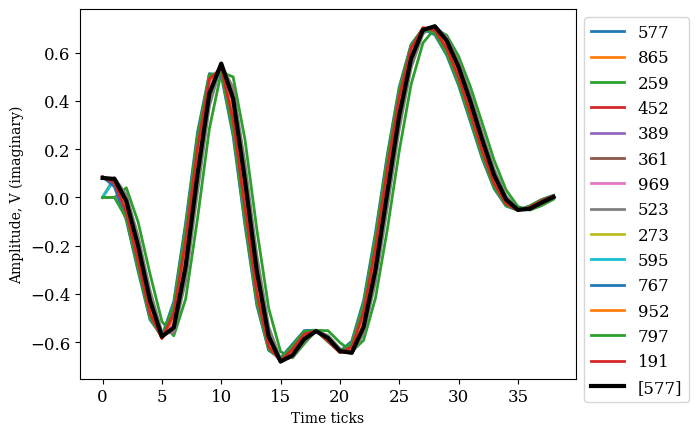

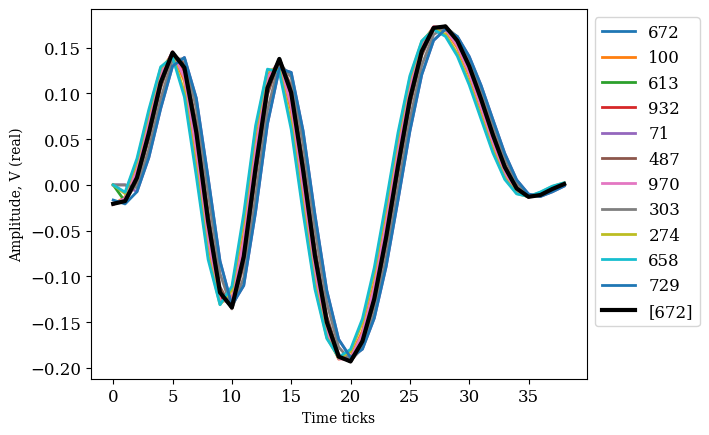

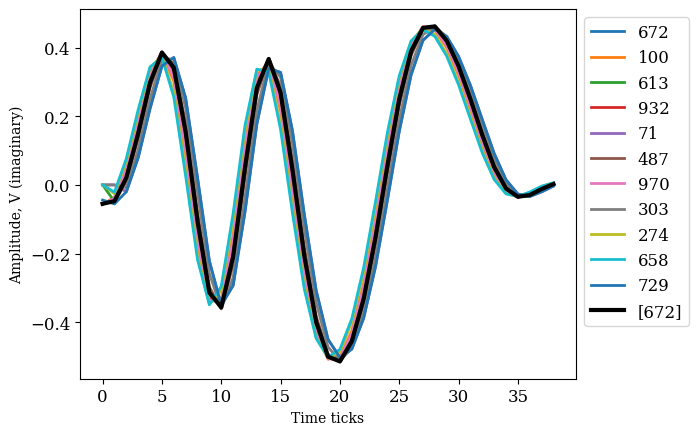

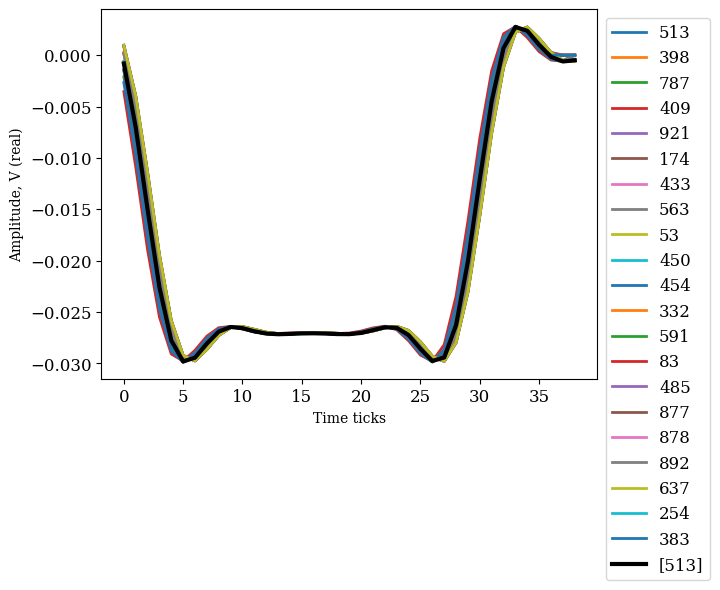

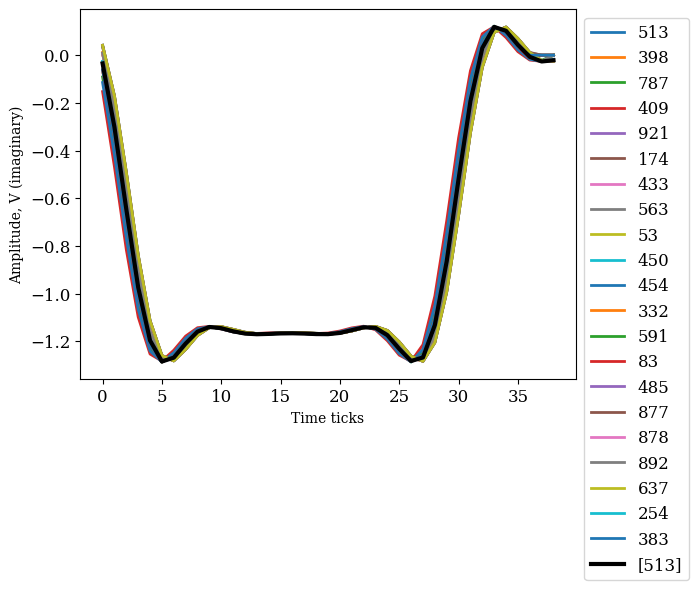

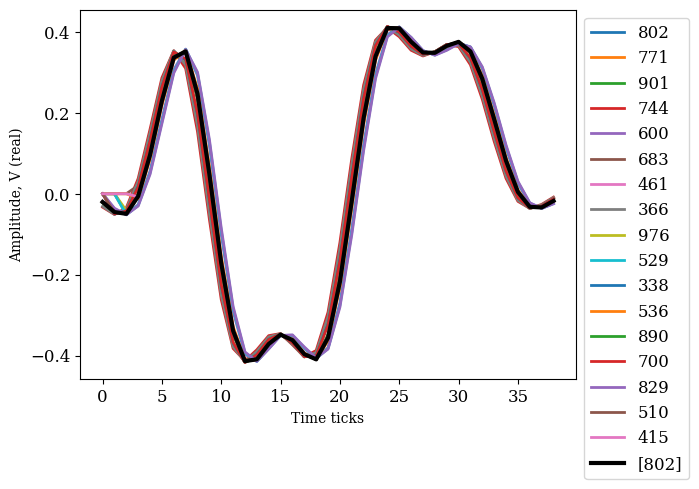

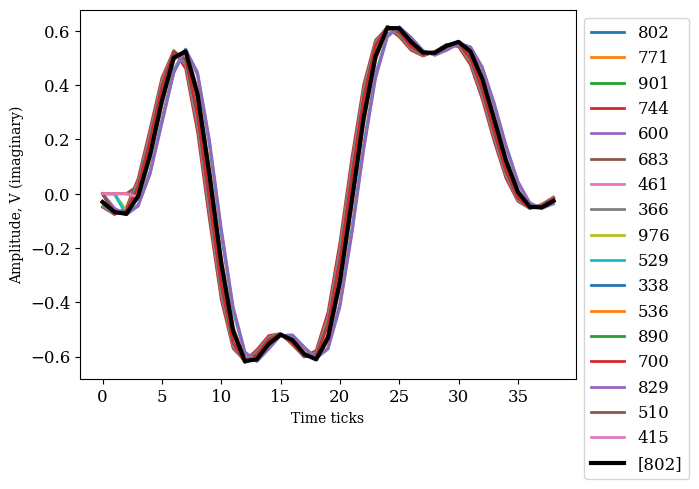

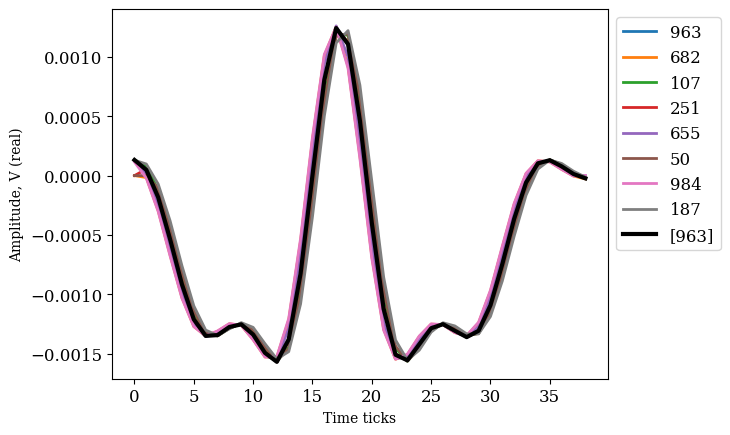

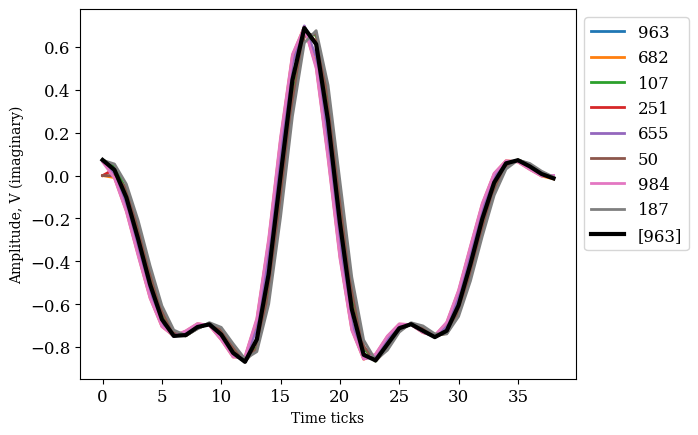

Clusters, total items: 64 995


In [ ]:
# Fora single memeber plot all clusters, just checking
DEMO_MAX = 5

demo_count = 0
for idx_c in idx_clusters:
  X = iqdata[idx_c,:].transpose()
  y = iqdata[idx_c[0],:]
  Y1mat = np.empty(X.shape, dtype=complex)

  for j in range(len(idx_c)):
    x = X[:,j]
    err_min, best_b, best_shift = find_shiftX_exhaust(x, np.empty((0)), y, 5)
    _ = shift_x(X[:,j], best_shift)
    y1 = np.column_stack([_]) @ best_b
    Y1mat[:,j] = y1
  plt_clust_Xy(Y1mat.transpose(), y, list(idx_c), [idx_c[0]])
  if demo_count > DEMO_MAX:
    break # Demo break
  demo_count += 1
print('Clusters, total items:', sum(1 for _ in idx_clusters), sum(len(i) for i in idx_clusters))

Source data


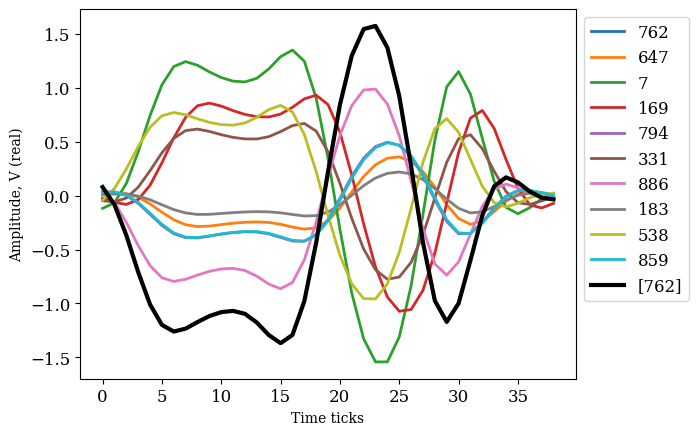

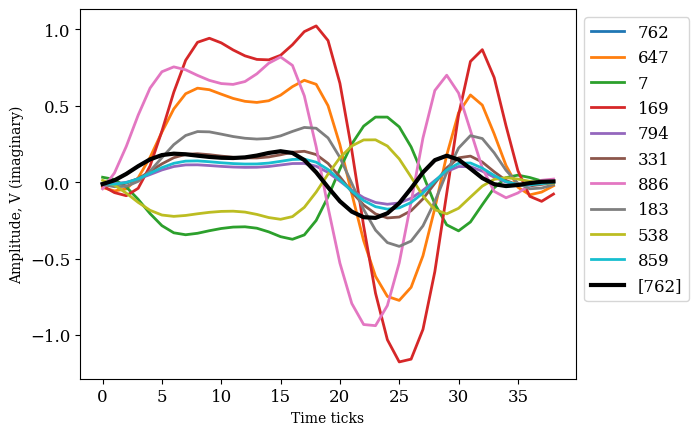

Shifted data


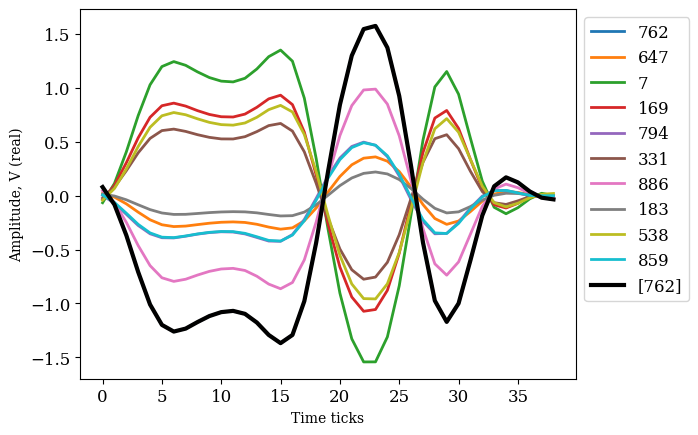

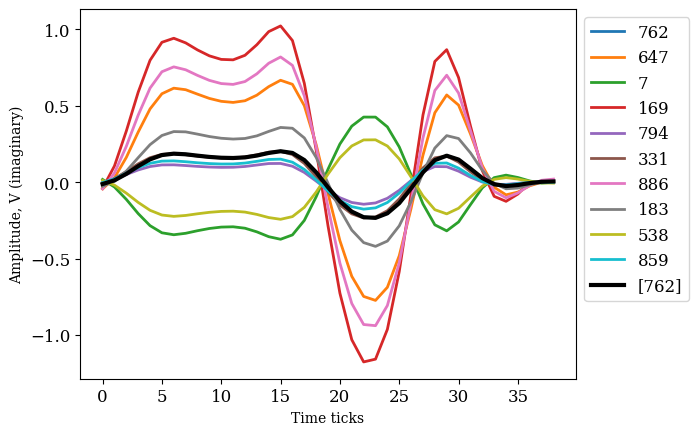

Shifted data with source noise


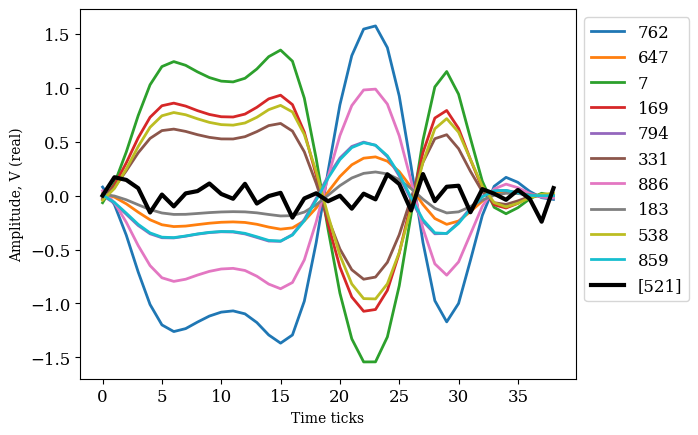

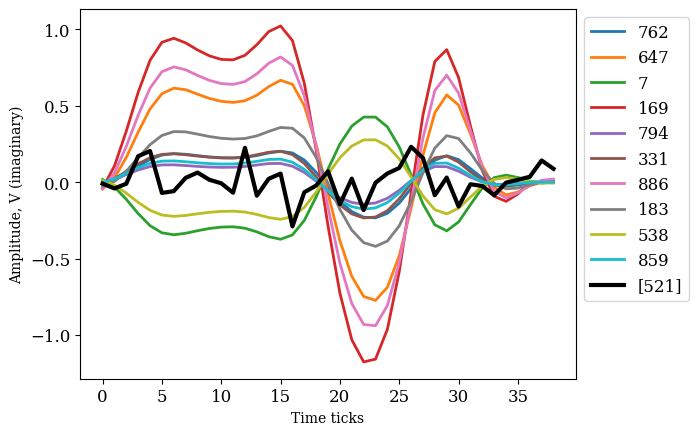

Scaled and shifted data


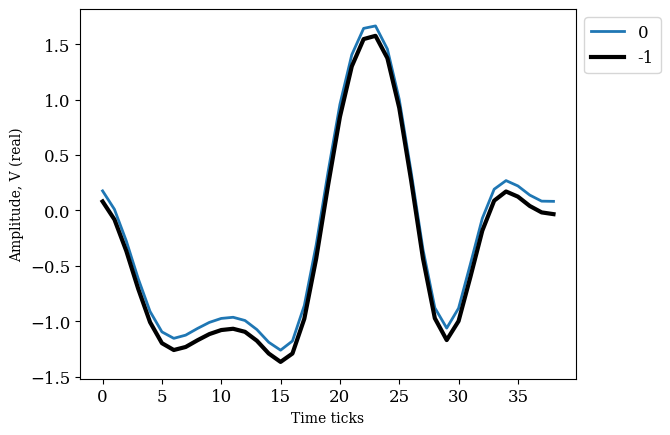

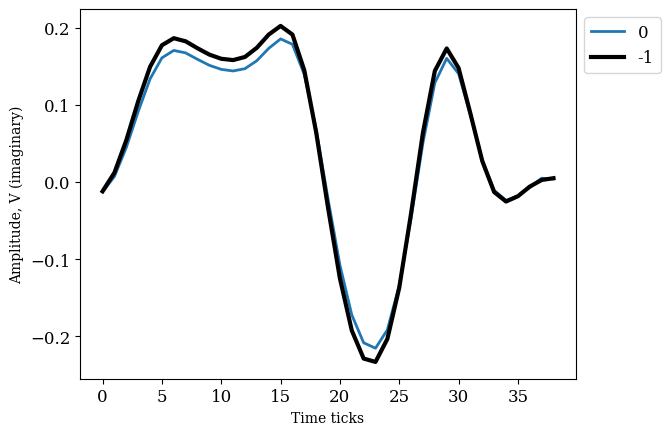

Source data


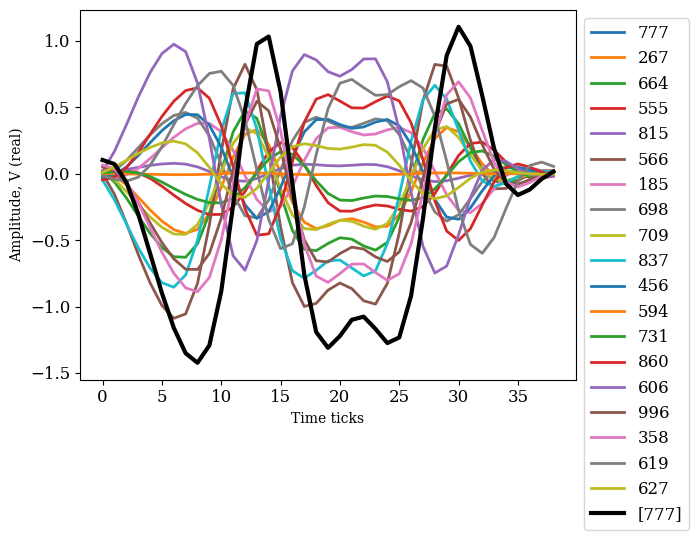

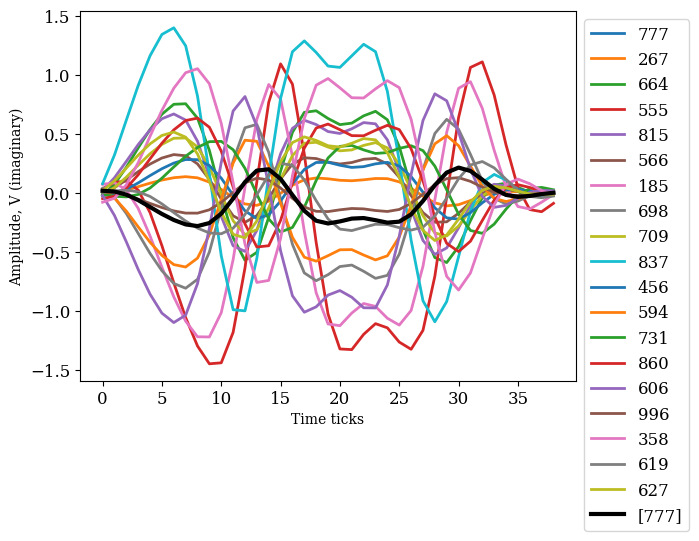

Shifted data


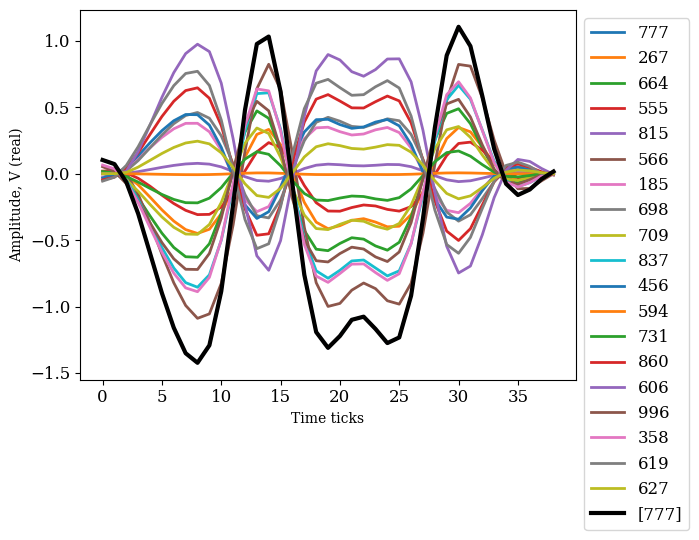

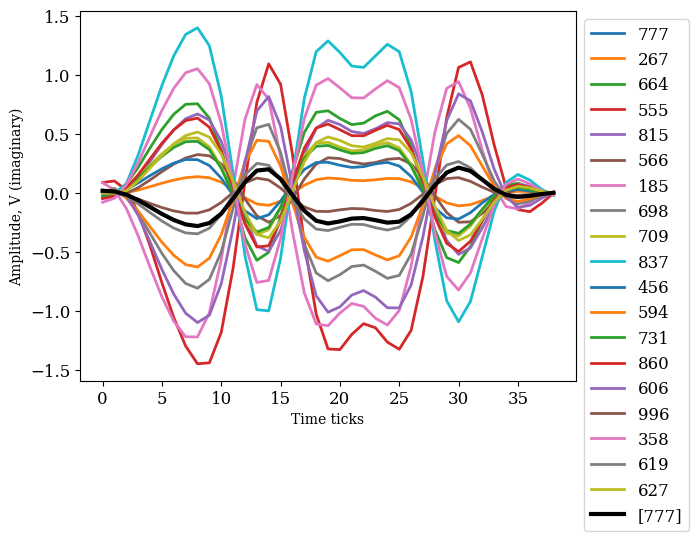

Shifted data with source noise


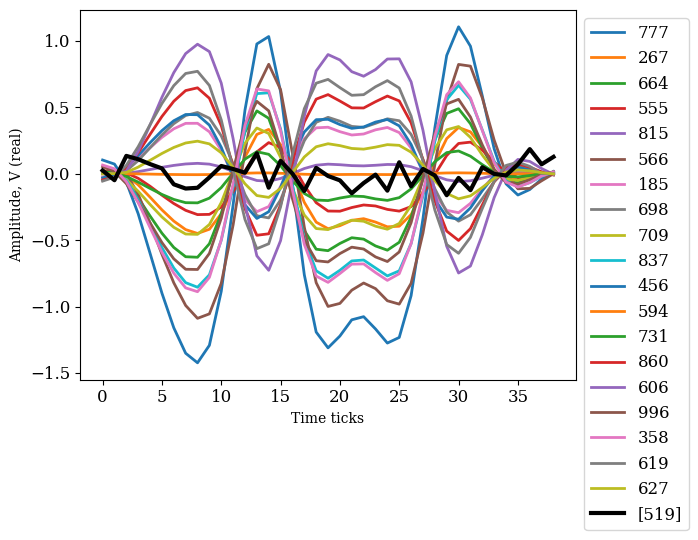

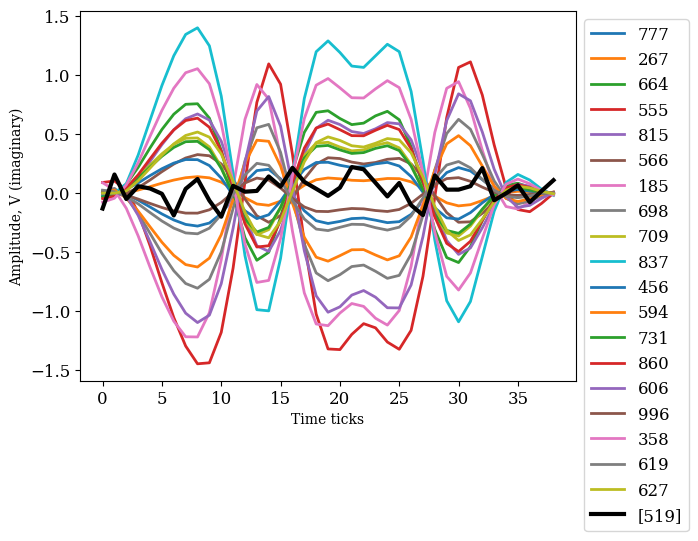

Scaled and shifted data


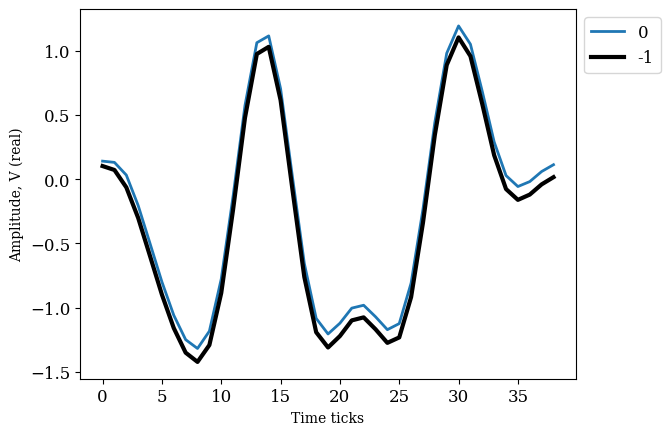

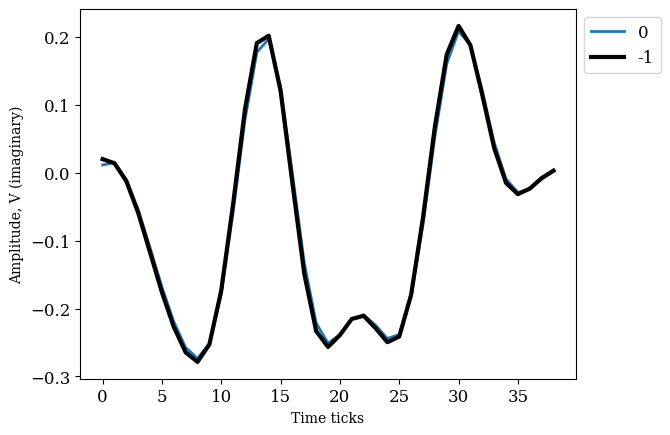

Source data


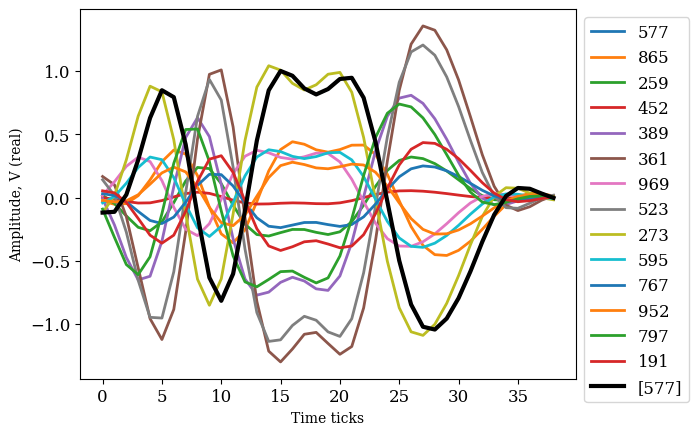

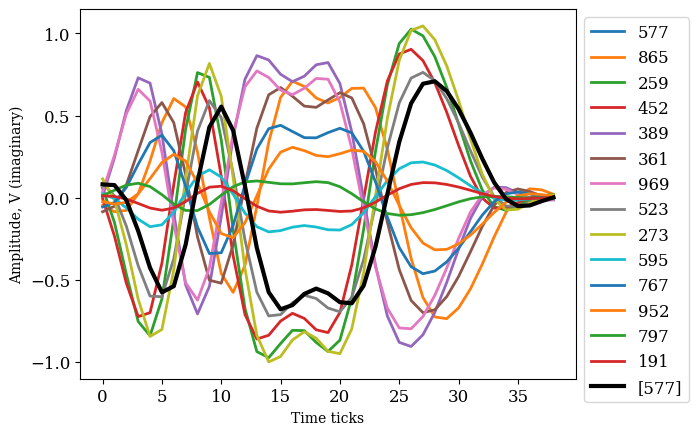

Shifted data


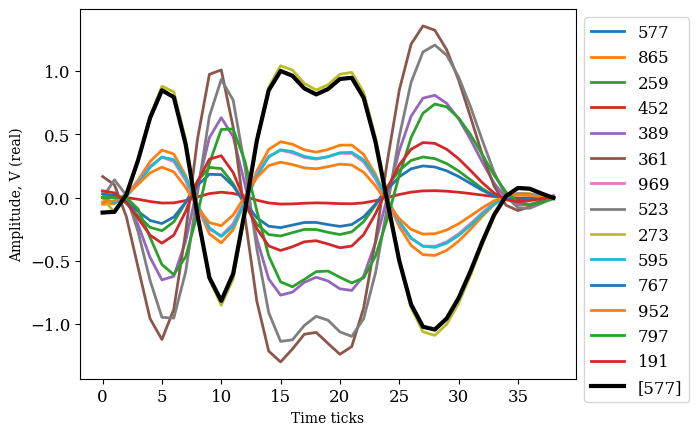

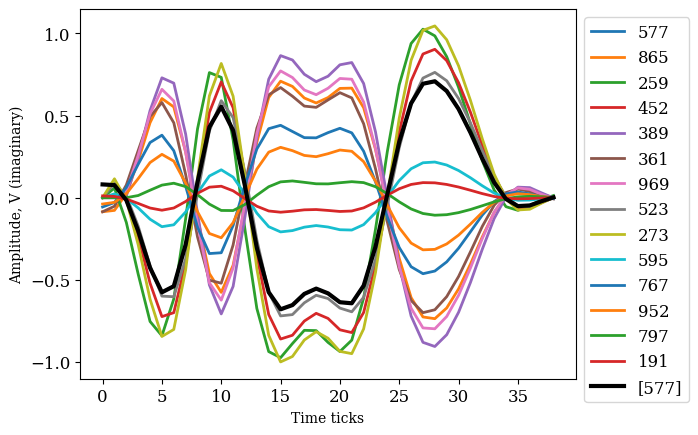

Shifted data with source noise


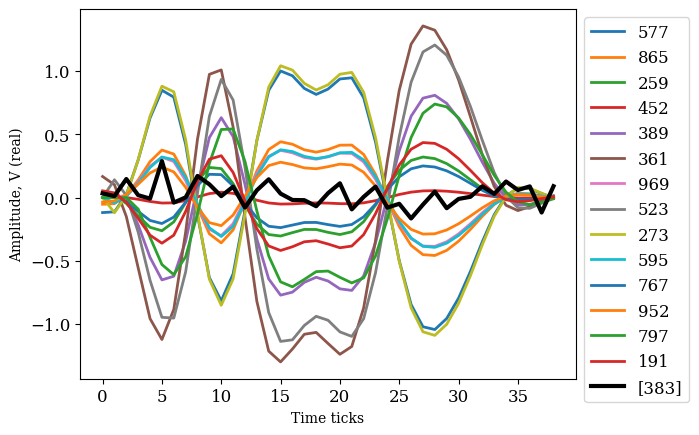

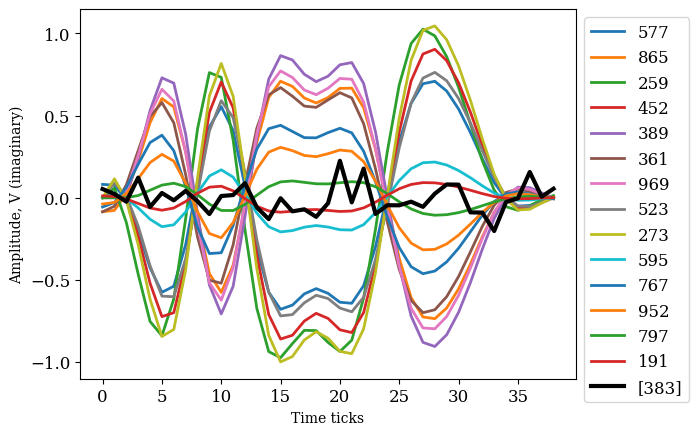

Scaled and shifted data


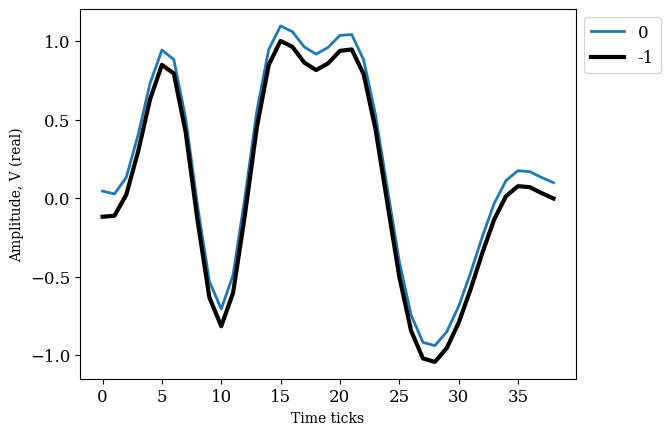

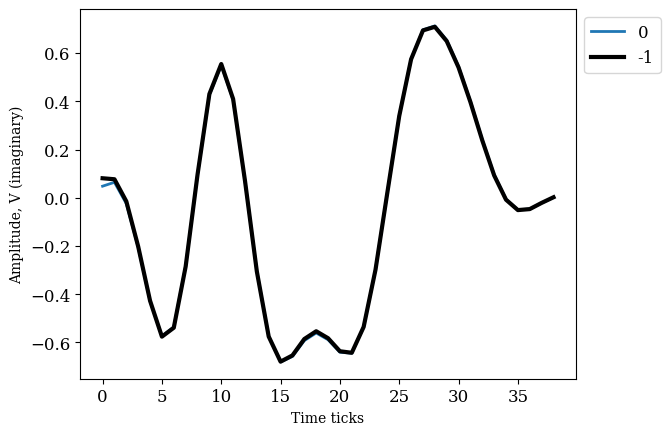

Source data


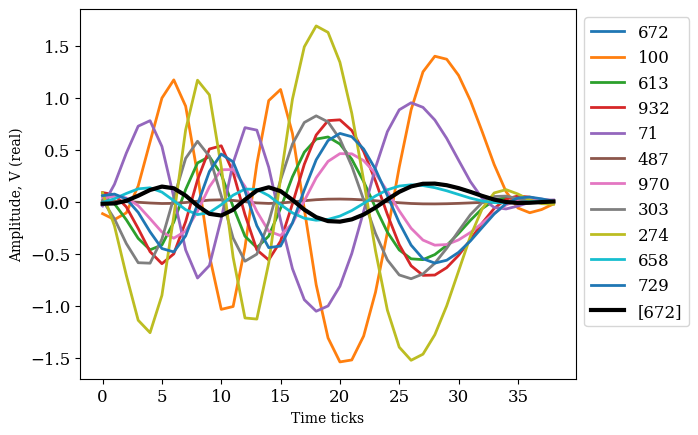

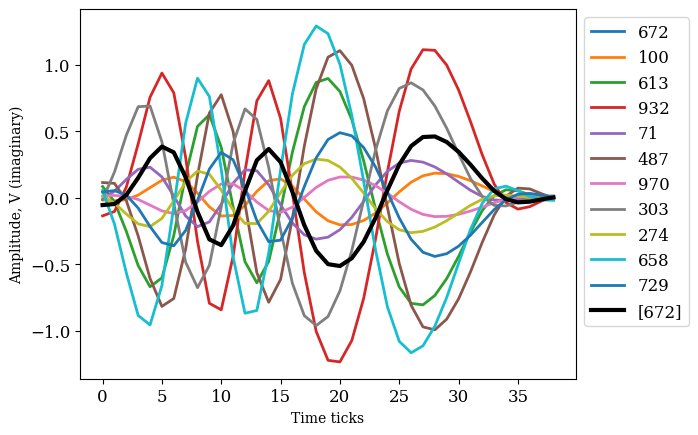

Shifted data


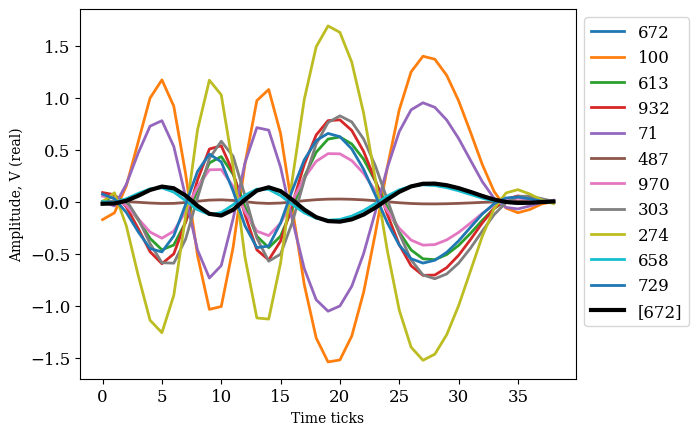

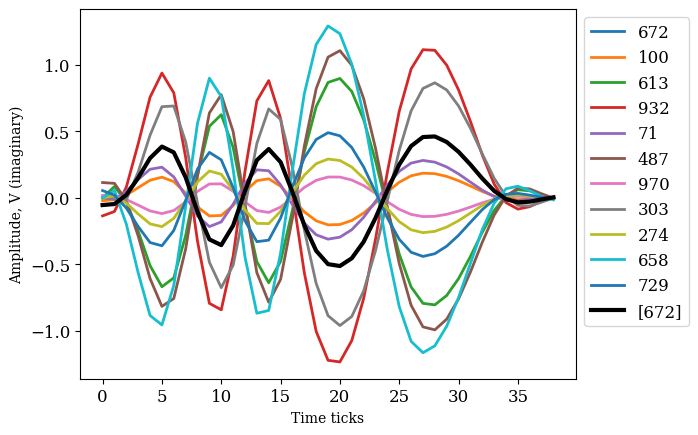

Shifted data with source noise


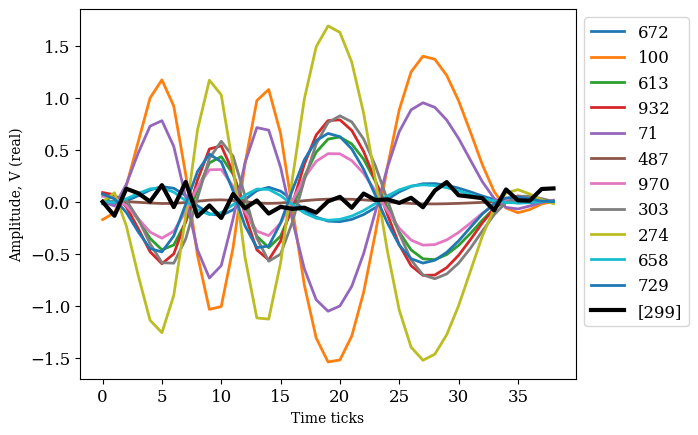

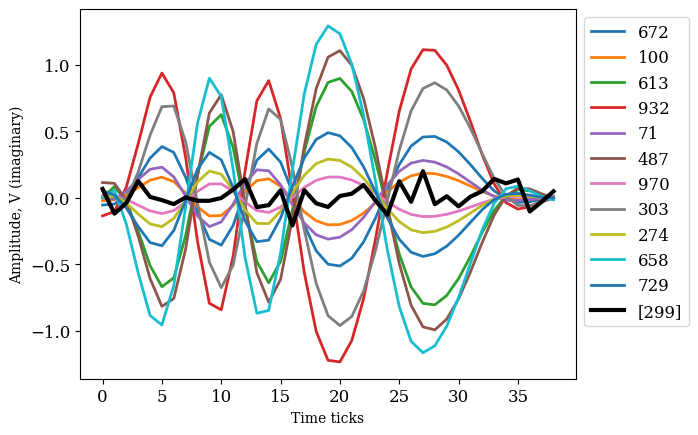

Scaled and shifted data


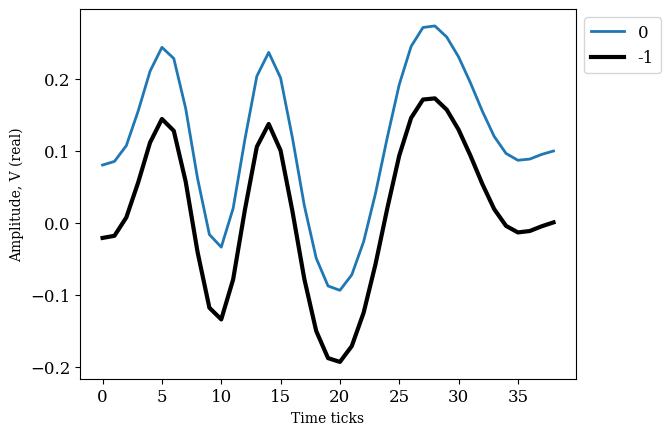

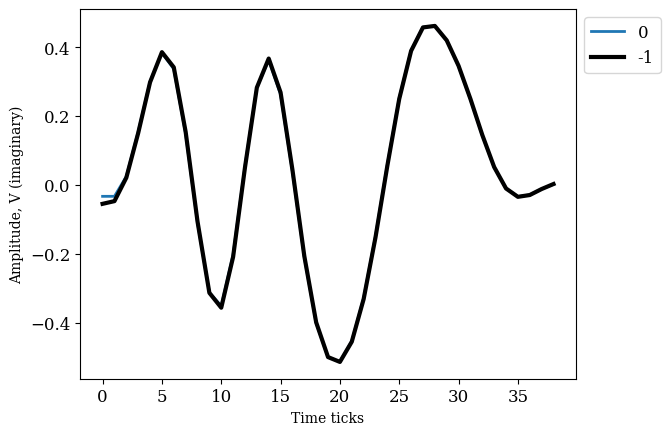

Source data


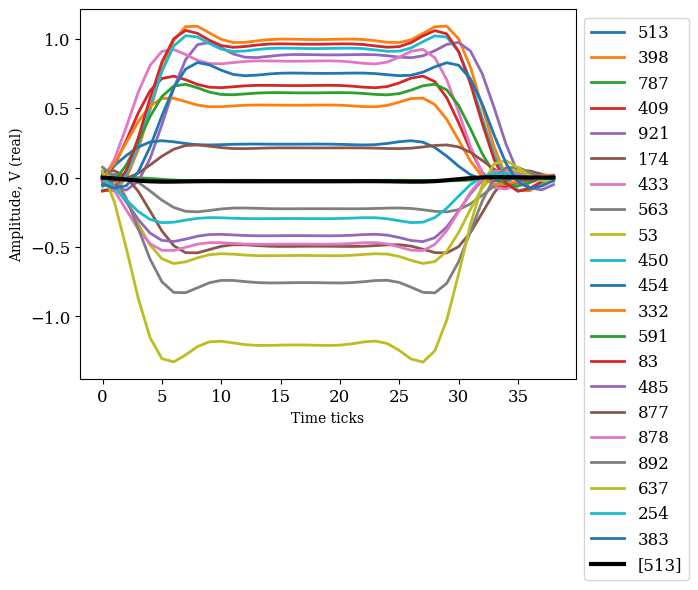

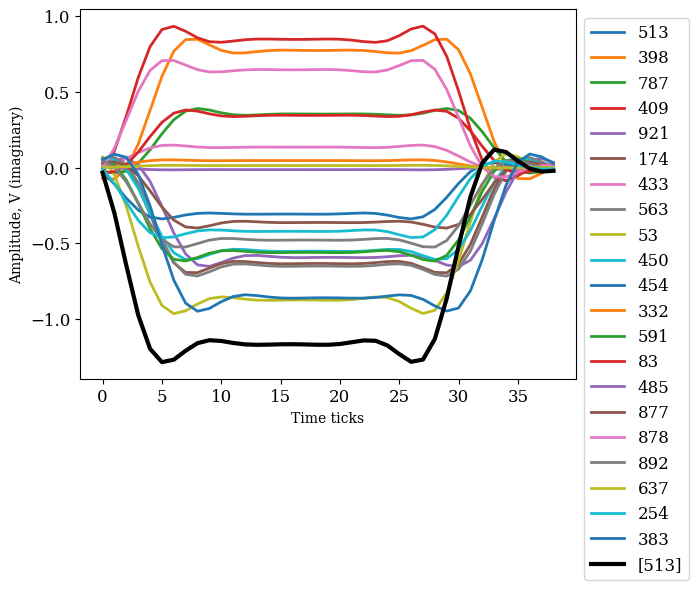

Shifted data


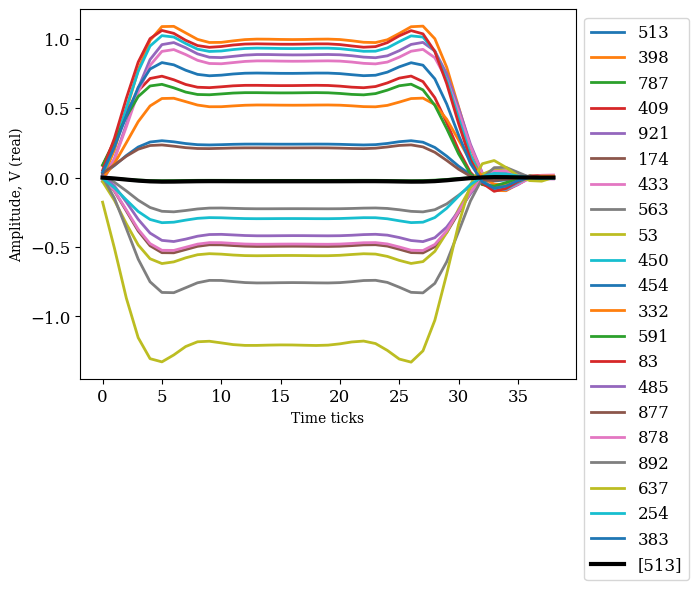

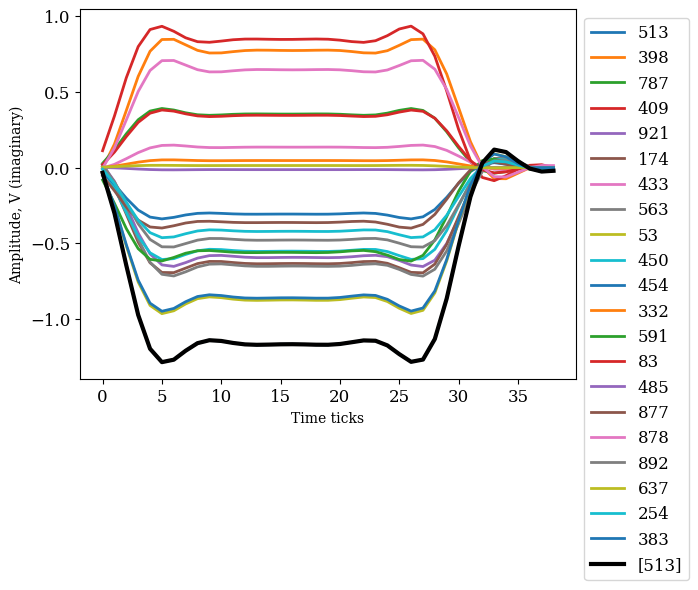

Shifted data with source noise


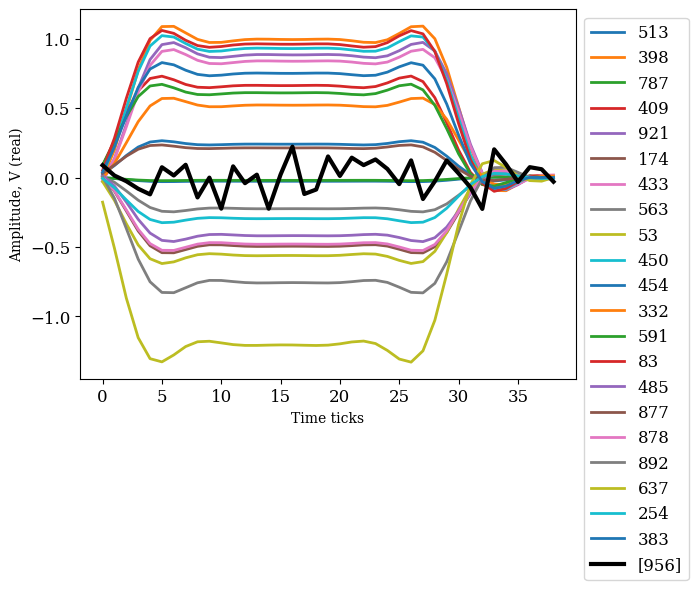

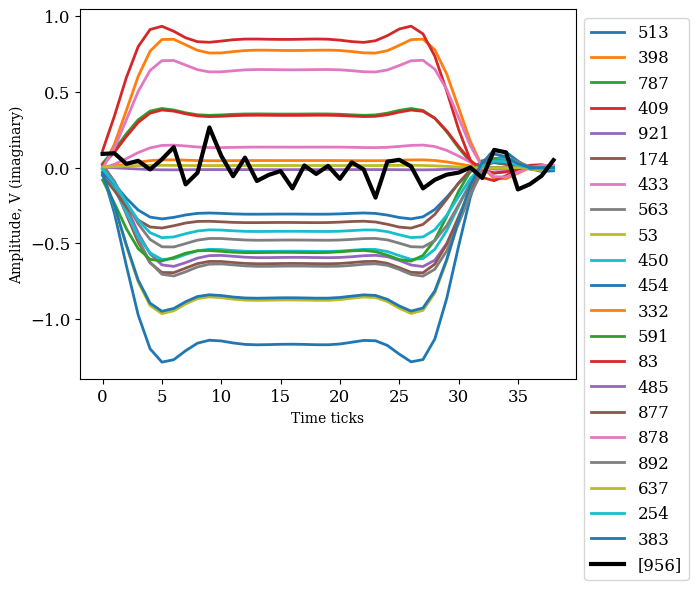

Scaled and shifted data


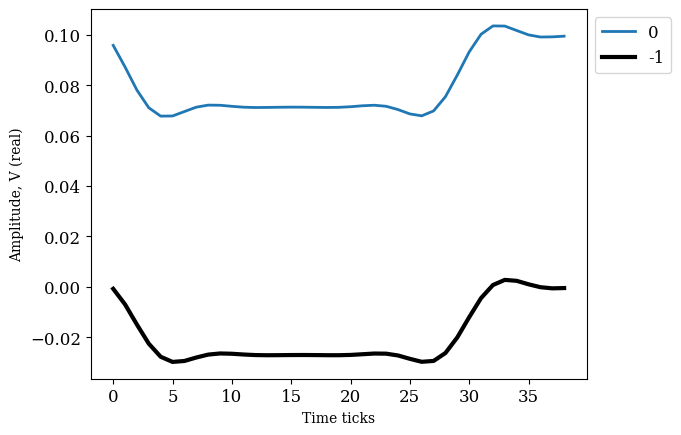

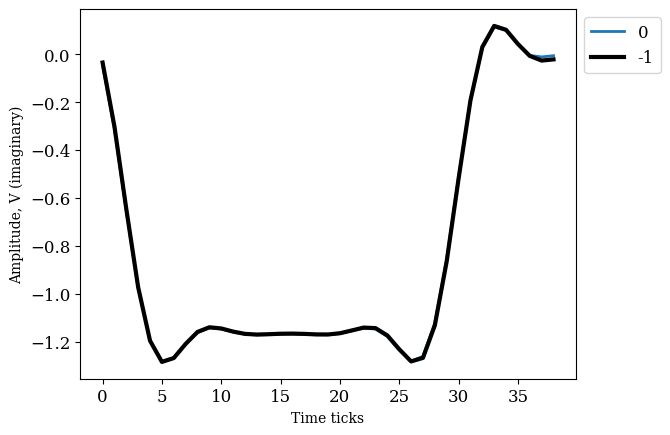

Source data


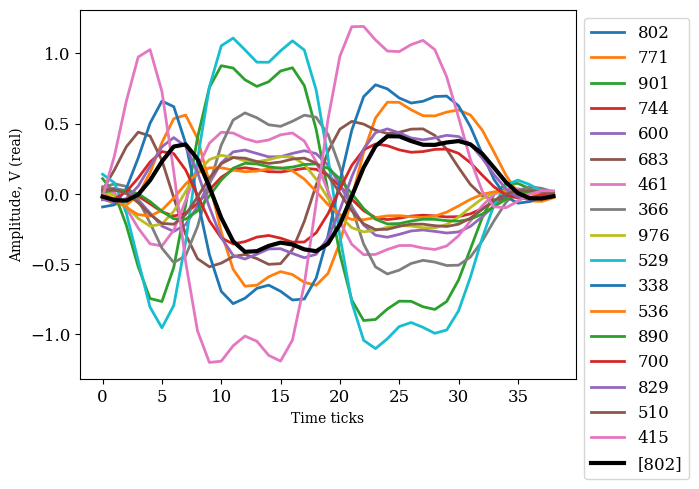

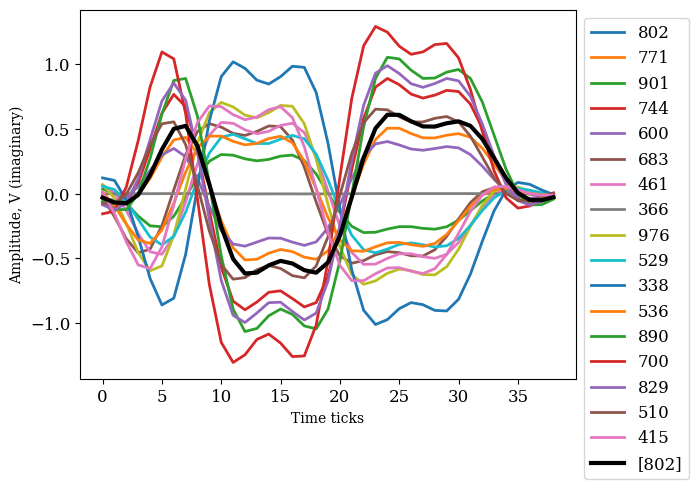

Shifted data


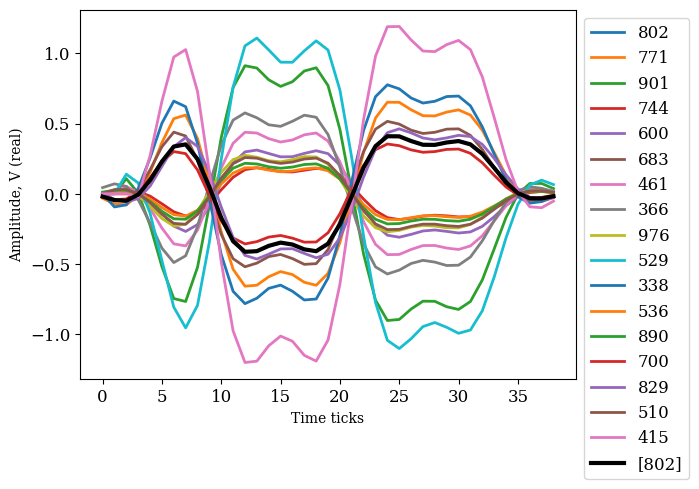

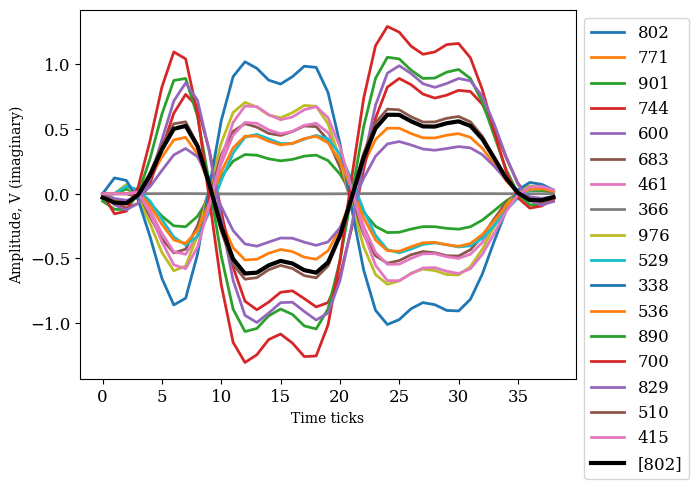

Shifted data with source noise


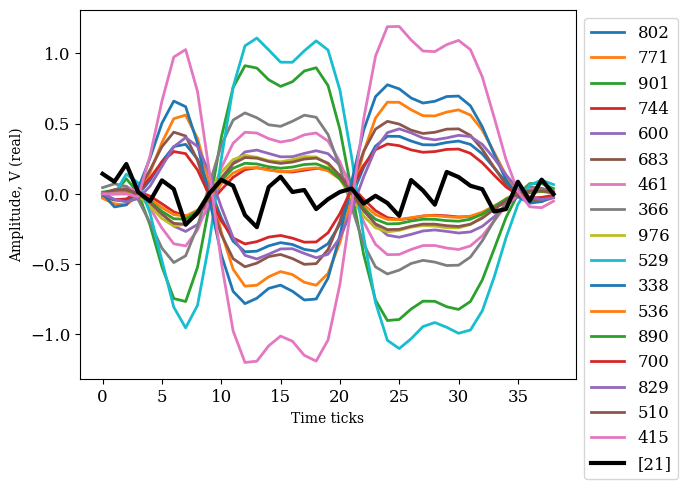

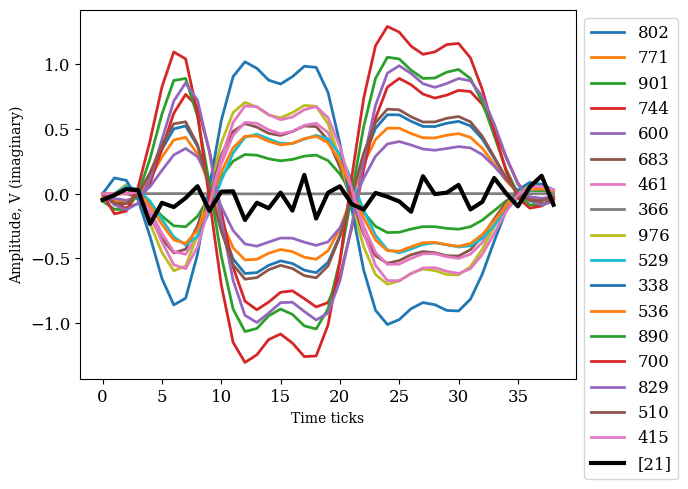

Scaled and shifted data


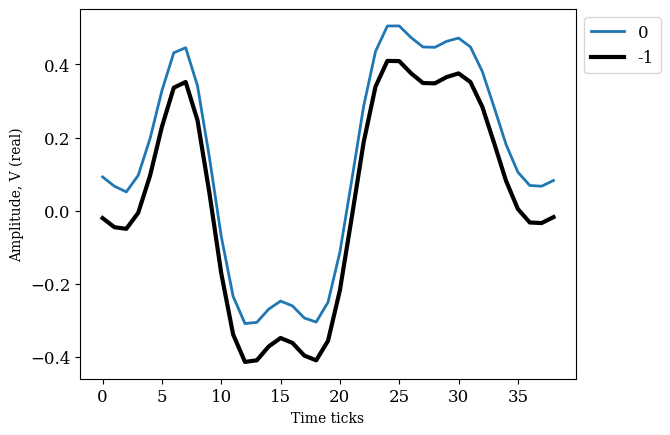

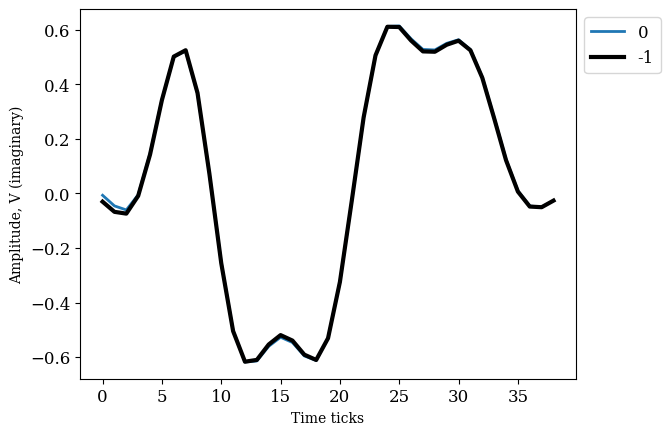

Source data


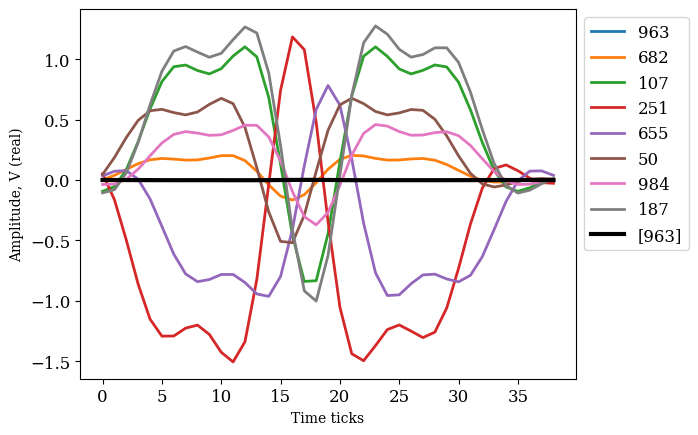

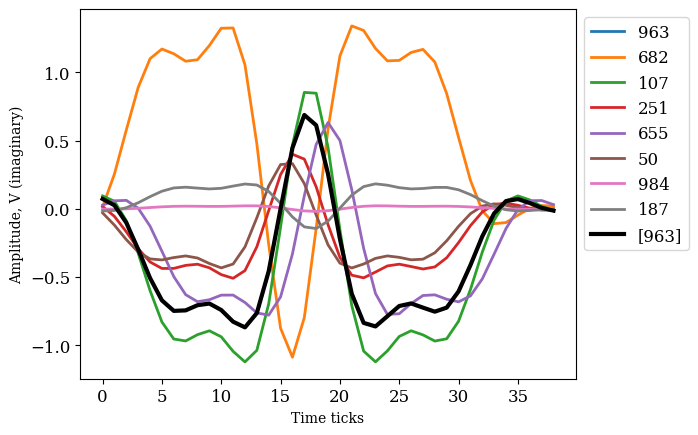

Shifted data


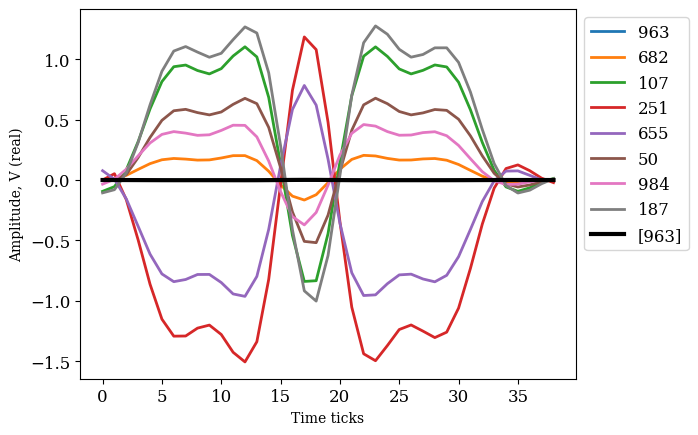

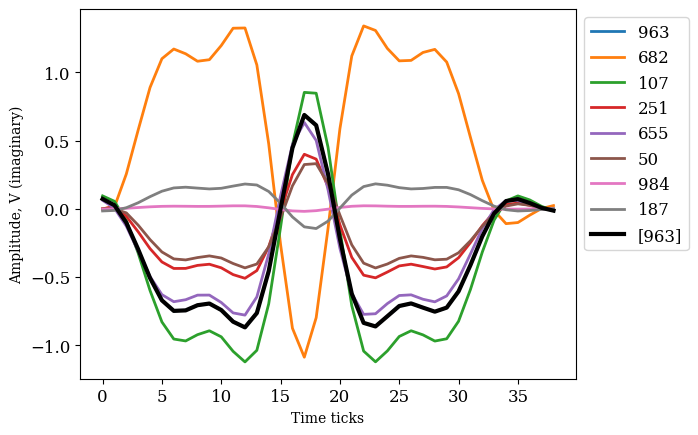

Shifted data with source noise


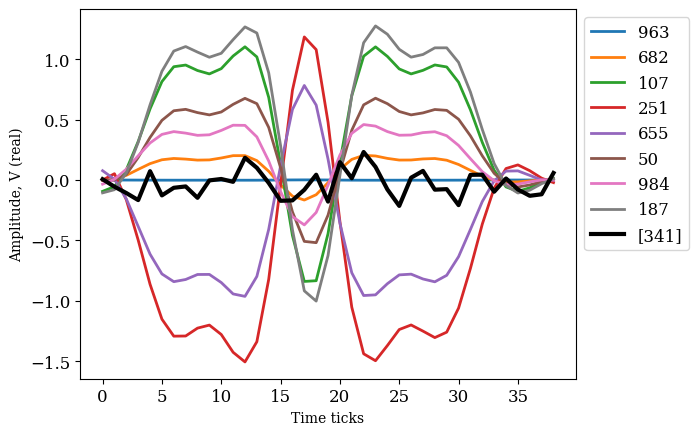

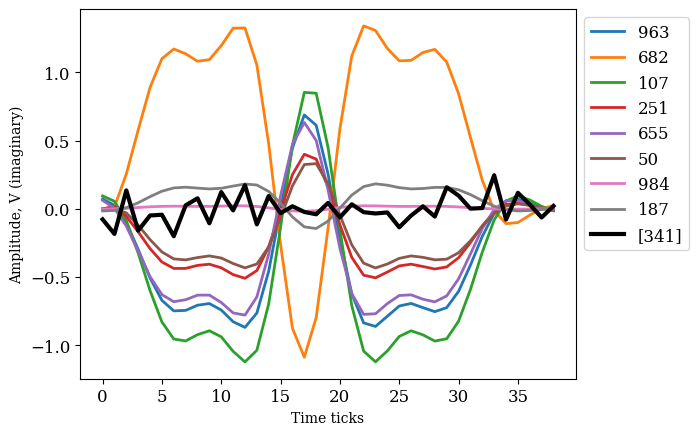

Scaled and shifted data


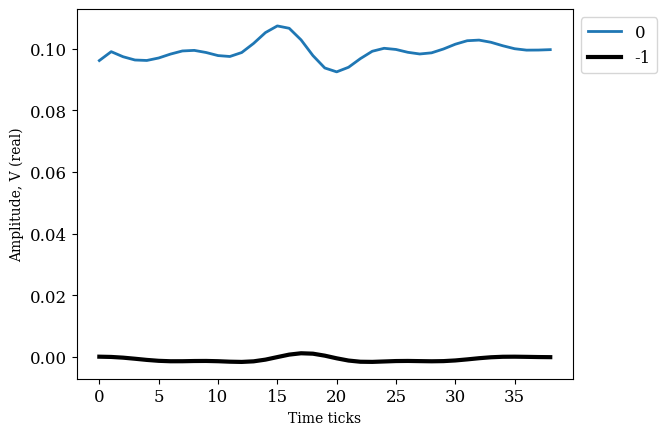

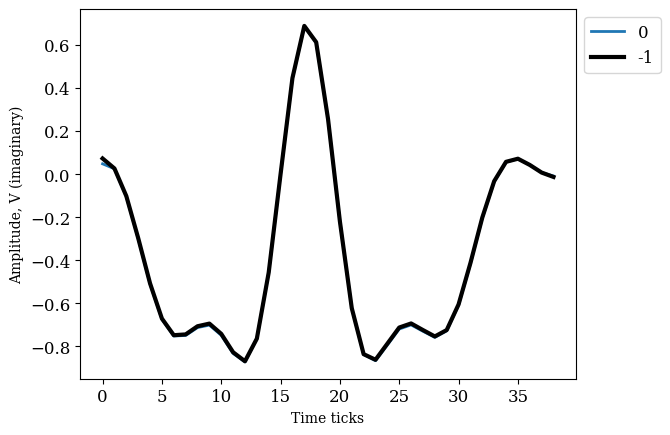

In [ ]:
# Plot the whole cluster
demo_count = 0
for idx_c in idx_clusters:
  X = iqdata[idx_c,:].transpose()
  y = iqdata[idx_c[0],:]

  added_shift = list() # np.empty((0,)) # Var2
  added_basis = np.empty((len(y), 0), dtype=complex) # Var2
  for j in range(len(idx_c)):
    x = X[:,j]
    # Add some noise to avoid multicollinearity
    noise = np.random.normal(loc=0, scale=0.1, size=added_basis.shape) + 1j * np.random.normal(loc=0, scale=0.1, size=added_basis.shape)
    # print('x', x.shape, 'ab', added_basis.shape, 'noi', noise.shape, 'y', y.shape)
    err_min, best_b, best_shift = find_shiftX_exhaust(x, added_basis + noise, y, 7)
    # Store results
    added_basis = np.column_stack((added_basis, x)) # store non-shifted item
    added_shift.append(best_shift)

  # Plot source data
  print('Source data')
  plt_clust_Xy(added_basis.transpose(), y, list(idx_c), [idx_c[0]])

  # Plot shifted data
  print('Shifted data')
  X_shifted = shift_X(X, added_shift)
  plt_clust_Xy(X_shifted.transpose(), y, list(idx_c), [idx_c[0]])

  # Plot shifted data with source noise
  print('Shifted data with source noise')
  idx_y_src_noise = np.random.choice(len(iqnoise), 1)[0]
  y_src_noise = iqnoise[idx_y_src_noise]
  plt_clust_Xy(X_shifted.transpose(), y_src_noise, list(idx_c), [idx_y_src_noise])

  # Plot scaled and shifted data
  print('Scaled and shifted data')
  noise = np.random.normal(loc=0, scale=0.05, size=X_shifted.shape) + 1j * np.random.normal(loc=0, scale=0.05, size=X_shifted.shape)
  b = np.linalg.lstsq(X_shifted + noise, y, rcond=None)[0]
  y1 = X_shifted @ b # Restored signal
  plt_clust_Xy(np.column_stack([y1+0.1]).transpose(), y) # Shift y1 a little to show
  # break # Demo break
  if demo_count > DEMO_MAX:
    break # Demo break
  demo_count += 1
